<a href="https://colab.research.google.com/github/gyana-ranjan-dash/Seoul_Bike_Sharing_Demand_Prediction/blob/main/Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


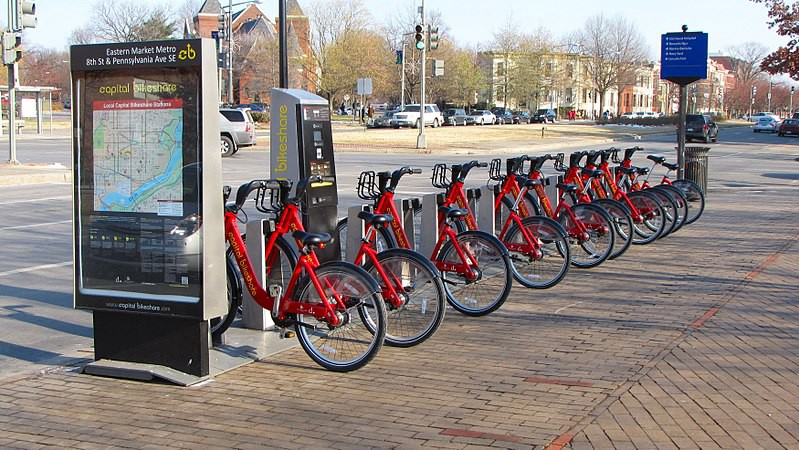



# <b><u> Seoul Bike Sharing Demand Prediction </u></b>

In [2]:
# from plotnine import*
# import datetime as dt
# import plotly.figure_factory as ff
# import plotly.graph_objects as go
# import plotly.offline as pyo
# import plotly.express as px
# from plotly.offline import init_notebook_mode
# %matplotlib inline

In [3]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# from itertools import cycle, islice
# from matplotlib.pyplot import figure
# %matplotlib inline
# import warnings
# warnings.filterwarnings('ignore')



--- Importing necessary files



In [51]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import*
import datetime as dt
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.offline as pyo
import plotly.express as px
from plotly.offline import init_notebook_mode
%matplotlib inline

## **Reading and importing Data**

In [52]:
#Loading data in the bike_df
bike_df = pd.read_csv('https://raw.githubusercontent.com/gyana-ranjan-dash/Seoul_Bike_Sharing_Demand_Prediction/main/SeoulBikeData.csv',encoding= 'unicode_escape',date_parser="Date")

In [53]:

bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


### **Understanding the Data**

In [54]:
# checking the shape of the dataset
bike_df.shape

(8760, 14)

Our dataset contains ``8760`` rows and ``14`` columns



In [55]:
# checking for the data types and null values in the dataset
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

 **Initial Observations**


*   ``date`` columns must be in data format not in object format



In [56]:
bike_df.describe(include='all', percentiles=[.25, .50, .75, .95,.99])

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,27/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summer,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


**Initial observation**


*   In the ``Rented Bike Count`` coloumn there seems to have few outliers
*   In the ``Snowfall`` column there is a huge difference between max and 99 percentile, looks  like an outlier



In [57]:
#cheking for null values 
bike_df.isnull().mean()

Date                         0.0
Rented Bike Count            0.0
Hour                         0.0
Temperature(°C)              0.0
Humidity(%)                  0.0
Wind speed (m/s)             0.0
Visibility (10m)             0.0
Dew point temperature(°C)    0.0
Solar Radiation (MJ/m2)      0.0
Rainfall(mm)                 0.0
Snowfall (cm)                0.0
Seasons                      0.0
Holiday                      0.0
Functioning Day              0.0
dtype: float64

**Initial observations**


  


*    Looks like there are no ``NULL`` values in the dataset



### **Cleaning and modifying the data**

In [58]:
# converting date column to datatime format
bike_df['Date']=pd.to_datetime(bike_df['Date'])

In [59]:
# Extracting year, day , month and weekdays from the date column
bike_df['Year'] = pd.DatetimeIndex(bike_df['Date']).year
bike_df['Day'] = pd.DatetimeIndex(bike_df['Date']).day
bike_df['Month']= pd.DatetimeIndex(bike_df['Date']).month
bike_df['weekday']=pd.DatetimeIndex(bike_df['Date']).weekday

In [60]:
bike_df['weekday'].unique()

array([3, 6, 2, 4, 0, 5, 1])



--- As the weekdays are in the range ``[0-6]`` we need to change this from ``[1-7]``



In [61]:
bike_df['weekday'] = bike_df['weekday'] +1
bike_df['weekday'].unique()

array([4, 7, 3, 5, 1, 6, 2])

In [67]:
(bike_df['Solar Radiation (MJ/m2)'].value_counts()/ len(bike_df['Solar Radiation (MJ/m2)']))*100

0.00    49.086758
0.01     1.461187
0.02     0.936073
0.03     0.787671
0.06     0.696347
          ...    
3.44     0.011416
3.35     0.011416
3.38     0.011416
2.97     0.011416
2.69     0.011416
Name: Solar Radiation (MJ/m2), Length: 345, dtype: float64

Nearly ``50%`` of data in ``Solar Radiation (MJ/m2)`` coulumn is ``0``, we can say this column does not affect the result and we can drop this

In [68]:
bike_df.drop('Solar Radiation (MJ/m2)', axis = 1, inplace = True)

### **Exploratory data analysis**

In [69]:
bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Day,Month,weekday
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,4
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,4
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,4
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,4
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,4


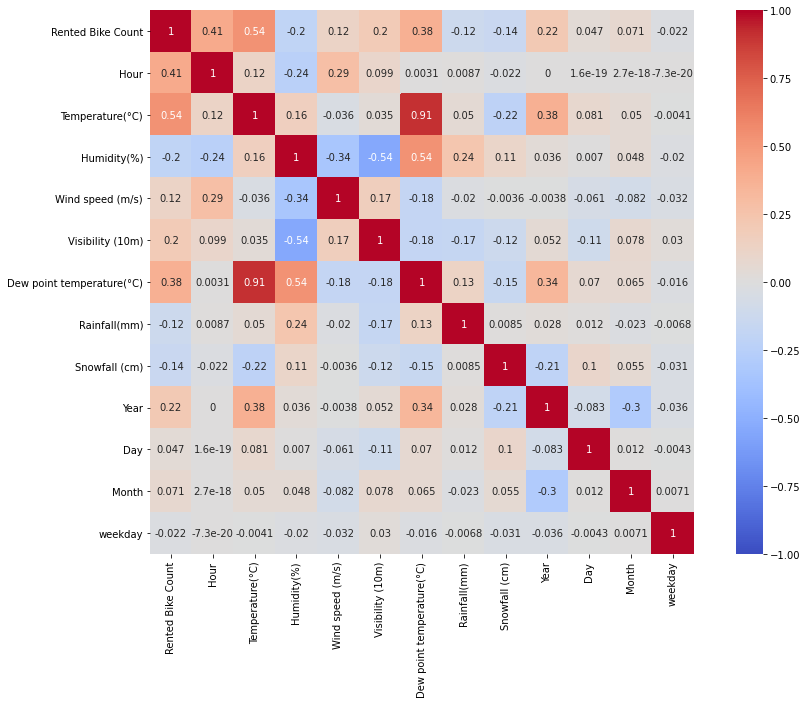

In [70]:
plt.figure(figsize=(15,10))
sns.heatmap(bike_df.corr("pearson"),
            vmin=-1, vmax=1,
            cmap='coolwarm',
            annot=True, 
            square=True);

**Insights**


*   There is a high correlation between ``Temperature`` and ``Dew point temperature`` No point of keeping both of them in the dataset. 



In [71]:
# dropping Dew point temperature column from the dataset
bike_df.drop('Dew point temperature(°C)', axis = 1, inplace = True)

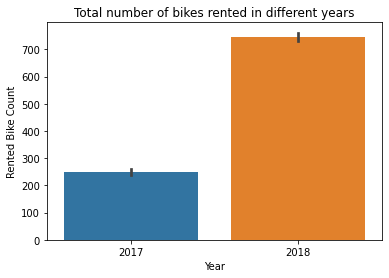

In [72]:
sns.barplot(x = 'Year', y = 'Rented Bike Count', data = bike_df)
plt.title("Total number of bikes rented in different years")
plt.show()

**Insights**


*   We can clearly see that the total number of bikes rented in the year ``2018`` in much higher than the total number of bikes rented in the year ``2017``



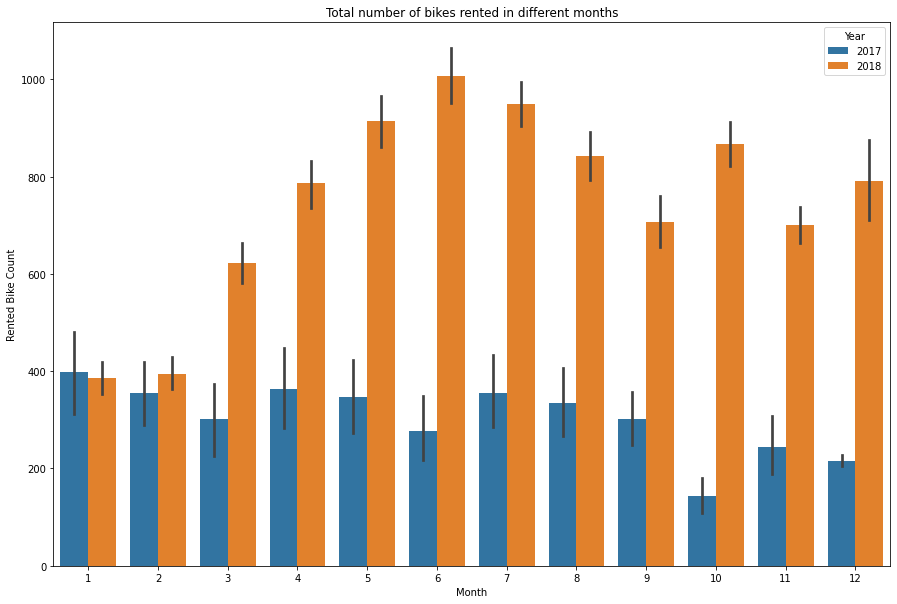

In [20]:
plt.figure(figsize=(15,10))
sns.barplot(x = 'Month', y = 'Rented Bike Count', data = bike_df, hue = 'Year')
plt.title("Total number of bikes rented in different months")
plt.show()

**Insights**


1.   From the above plot we can say that in the month of ``jan`` and ``feb`` there is not much of a difference in the sales, but later the sales increase drastically in the year ``2018``


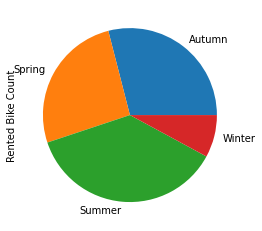

In [21]:
bike_df.groupby('Seasons').sum()['Rented Bike Count'].plot.pie()


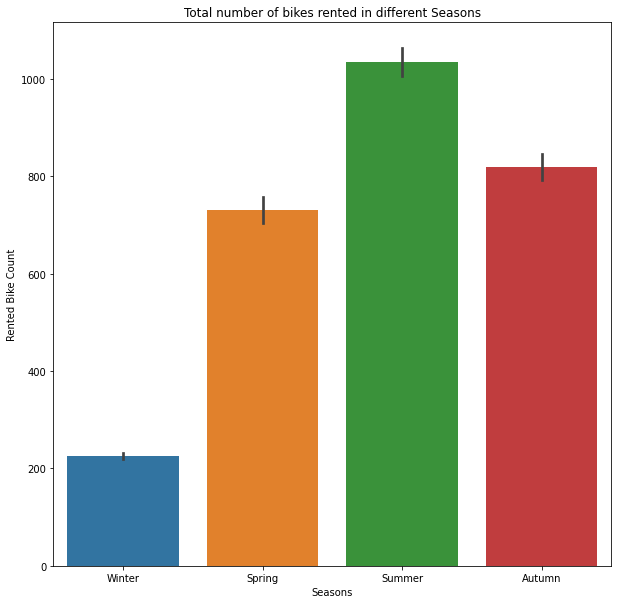

In [22]:
plt.figure(figsize=(10,10))
sns.barplot(x = 'Seasons', y = 'Rented Bike Count', data = bike_df)
plt.title("Total number of bikes rented in different Seasons")
plt.show()

In [23]:
bike_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Rainfall(mm)', 'Snowfall (cm)',
       'Seasons', 'Holiday', 'Functioning Day', 'Year', 'Day', 'Month',
       'weekday'],
      dtype='object')

In [24]:

for i in bike_df.describe().columns:
  if i not in ['Rented Bike Count','Year','Day','Month','weekday','Hour']:
    display(px.scatter(bike_df,i,'Rented Bike Count',trendline="ols",trendline_color_override='yellow',opacity=0.6,title=f"{i} and Rented Bike Count"),width=500,length=500)

**Insights**

From above plots we can say



*   ``Temperature`` affects the the number of rented bike directly, People prefer to rent bikes in a hotter days.
*   ``humidity`` Doest not affect the number of rented bikes much
*   If the  ``windspeed`` is high people less likely to rent a bike
*   When the ``visibility`` is low  the number of rented bikes is also low
*   When there is a heavy ``snowfall`` people less likely to rent a bike









Text(0.5, 1.0, 'Holiday')

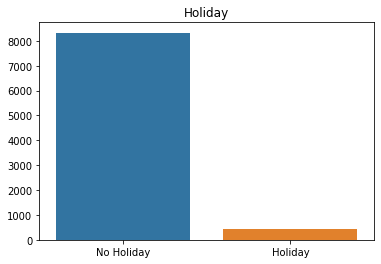

In [25]:
sns.barplot(bike_df['Holiday'].unique(),list(pd.DataFrame(bike_df['Holiday'].value_counts()).iloc[:,0]))
plt.title('Holiday')



--- Most number of bikes are rented when there is no holiday.



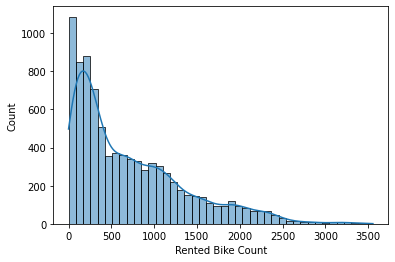

In [26]:
sns.histplot(data=bike_df, x="Rented Bike Count", kde= True)
plt.show()



--- The data is positively skewed



**Label Encoding**

In [27]:
bike_df = bike_df.replace({'No':0,'Yes':1,'Holiday':1,'No Holiday':0})


In [28]:
#creating dummy varaible for seasons
season_dummy = pd.get_dummies(bike_df['Seasons'])
for i in season_dummy.columns:
  bike_df[i]= season_dummy[i]
bike_df.drop('Seasons',axis='columns',inplace=True)
bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Year,Day,Month,weekday,Autumn,Spring,Summer,Winter
0,2017-01-12,254,0,-5.2,37,2.2,2000,0.0,0.0,0,1,2017,12,1,4,0,0,0,1
1,2017-01-12,204,1,-5.5,38,0.8,2000,0.0,0.0,0,1,2017,12,1,4,0,0,0,1
2,2017-01-12,173,2,-6.0,39,1.0,2000,0.0,0.0,0,1,2017,12,1,4,0,0,0,1
3,2017-01-12,107,3,-6.2,40,0.9,2000,0.0,0.0,0,1,2017,12,1,4,0,0,0,1
4,2017-01-12,78,4,-6.0,36,2.3,2000,0.0,0.0,0,1,2017,12,1,4,0,0,0,1


In [29]:
# dropping date column as it is not required
bike_df.drop('Date', axis = 1 ,inplace= True)

## **Model Building**

In [30]:
x = bike_df.drop('Rented Bike Count',axis=1)
y = bike_df['Rented Bike Count']
x.head()

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Year,Day,Month,weekday,Autumn,Spring,Summer,Winter
0,0,-5.2,37,2.2,2000,0.0,0.0,0,1,2017,12,1,4,0,0,0,1
1,1,-5.5,38,0.8,2000,0.0,0.0,0,1,2017,12,1,4,0,0,0,1
2,2,-6.0,39,1.0,2000,0.0,0.0,0,1,2017,12,1,4,0,0,0,1
3,3,-6.2,40,0.9,2000,0.0,0.0,0,1,2017,12,1,4,0,0,0,1
4,4,-6.0,36,2.3,2000,0.0,0.0,0,1,2017,12,1,4,0,0,0,1


In [31]:
# spliting the model into test and train
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split( x,y , test_size = 0.2, random_state = 0)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(7008, 17)
(7008,)
(1752, 17)
(1752,)


## **Linear Regression**

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegressionCV
import sklearn.metrics as met

In [33]:
linear_reg = LinearRegression()
linear_reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
train_pred = linear_reg.predict(x_train)
linear_reg.score(x_train,y_train)

0.5464916487075648

In [35]:
met.r2_score(y_train,linear_reg.predict(x_train))


0.5464916487075648

In [36]:
met.r2_score(y_test,linear_reg.predict(x_test))


0.5400196744538621

In [37]:
from sklearn.tree import DecisionTreeRegressor
for min_sam_leaf in range(1,50):
  DT_reg = DecisionTreeRegressor(criterion='mse',min_samples_leaf=min_sam_leaf)
  DT_reg.fit(x_train,y_train)
  print(f"\nR-sqared on train dataset when min leaf {min_sam_leaf} : {met.r2_score(y_train,DT_reg.predict(x_train))}")
  print(f"R-sqared on test dataset when min leaf {min_sam_leaf}: {met.r2_score(y_test,DT_reg.predict(x_test))}")
  print(f"Mean absolute error on test dataset when min leaf {min_sam_leaf}: {met.mean_absolute_error(y_test,DT_reg.predict(x_test))}")
  print(f"Mean squared error on test dataset when min leaf {min_sam_leaf}: {met.mean_squared_error(y_test,DT_reg.predict(x_test))}")


R-sqared on train dataset when min leaf 1 : 1.0
R-sqared on test dataset when min leaf 1: 0.8074006128041571
Mean absolute error on test dataset when min leaf 1: 156.1415525114155
Mean squared error on test dataset when min leaf 1: 80607.19406392695

R-sqared on train dataset when min leaf 2 : 0.9867463054444644
R-sqared on test dataset when min leaf 2: 0.8259794253813452
Mean absolute error on test dataset when min leaf 2: 152.63993531202436
Mean squared error on test dataset when min leaf 2: 72831.54133371385

R-sqared on train dataset when min leaf 3 : 0.9709754588388727
R-sqared on test dataset when min leaf 3: 0.8323204974841446
Mean absolute error on test dataset when min leaf 3: 153.0043283866058
Mean squared error on test dataset when min leaf 3: 70177.65942367454

R-sqared on train dataset when min leaf 4 : 0.9595916073153188
R-sqared on test dataset when min leaf 4: 0.8339800062329269
Mean absolute error on test dataset when min leaf 4: 149.6467791911285
Mean squared error o

In [38]:

DT_reg = DecisionTreeRegressor(criterion='mse',min_samples_leaf=6)
DT_reg.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=6, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [39]:
from sklearn.metrics import r2_score
# Performance on Test Dataset

print(f"r-square score on test data :{r2_score(y_test,DT_reg.predict(x_test))}")
print(f"adjusted r-square score on test data :{1-(1-r2_score((y_test),DT_reg.predict(x_test)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))}")
print(f"homogeneity score on test data :{met.homogeneity_score(y_test,DT_reg.predict(x_test))}")
print(f"mean squared error score on test data :{met.mean_squared_error(y_test,DT_reg.predict(x_test))}")

r-square score on test data :0.8503693711018963
adjusted r-square score on test data :0.8489024041519149
homogeneity score on test data :0.8545323473694381
mean squared error score on test data :62623.798118487575


In [40]:
features = pd.DataFrame(list(zip(DT_reg.feature_importances_,x.columns)),columns=['Score','Features'])
features=features.sort_values('Score',ascending=False)

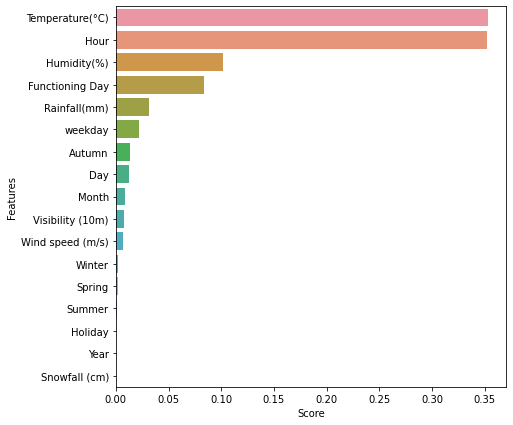

In [41]:
plt.figure(figsize=(7,7))
sns.barplot(x=features['Score'],y=features['Features'])

In [42]:

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [43]:
#number of trees
n_estimators = [100,120]

#Maximum depth of tree
max_depth = [6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [44]:
gboost= GradientBoostingRegressor()
gb_grid =GridSearchCV(estimator=gboost, param_grid = param_dict,cv = 5, verbose=2)
gb_grid.fit(x_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.6s
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.6s
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.6s
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.6s
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=100 
[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=100, total=   1.6s
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=120 
[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=120, total=   1.9s
[CV] max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=120 
[CV]  max_depth=6, min_samples_leaf=40, min_samples_split=50, n_estimators=120, total=   1.9s
[CV] max_depth=6, min_samples_leaf=40, mi

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  2.6min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_n...ange=None,
                  

In [45]:
gb_grid.best_params_


{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 120}

In [46]:
gb_boost_with_best_perams= GradientBoostingRegressor(max_depth= 8,
 min_samples_leaf= 40,
 min_samples_split = 50,
 n_estimators = 120)
gb_boost_with_best_perams.fit(x_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=8,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=40, min_samples_split=50,
                          min_weight_fraction_leaf=0.0, n_estimators=120,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [47]:

#Gredient boost score on train data

gb_boost_with_best_perams.score(x_train,y_train)

0.9555336347182833

In [48]:

#Gredient boost score on test data
gb_boost_with_best_perams.score(x_test,y_test)

0.9099827287081566

In [49]:
# Performance on Test Dataset

print(f"r-square score on test data :{r2_score(y_test,gb_boost_with_best_perams.predict(x_test))}")
print(f"adjusted r-square score on test data :{1-(1-r2_score((y_test),gb_boost_with_best_perams.predict(x_test)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))}")
print(f"homogeneity score on test data :{met.homogeneity_score(y_test,gb_boost_with_best_perams.predict(x_test))}")
print(f"mean squared error score on test data :{met.mean_squared_error(y_test,gb_boost_with_best_perams.predict(x_test))}")

r-square score on test data :0.9099827287081566
adjusted r-square score on test data :0.9091002064405894
homogeneity score on test data :1.0
mean squared error score on test data :37674.261386660306


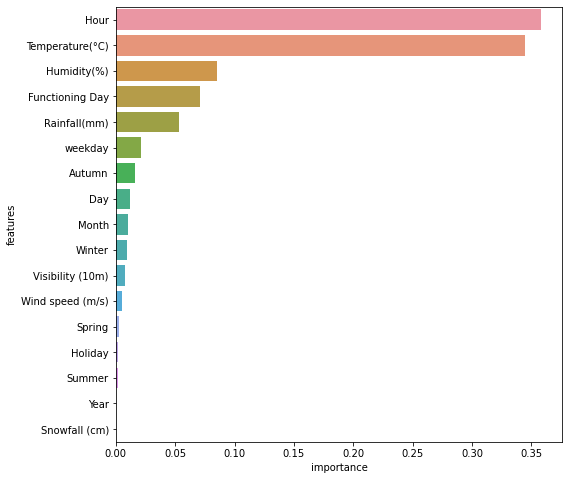

In [50]:

plt.figure(figsize=(8,8))
features_importance_gb = pd.DataFrame({'features':x_train.columns,'importance' : gb_boost_with_best_perams.feature_importances_})
features_importance_gb.sort_values(by='importance',ascending=False,inplace=True)
sns.barplot(features_importance_gb['importance'],features_importance_gb['features'])
